=== Interface ===
x_Ai = 0.25759983564802813
y_Ai = 0.19713187276839167

=== Flux ===
N_A = 0.0003786600110511055 kgmol/(s*m^2)
N_A (overall-y) = 0.0003786600110511715
N_A (overall-x) = 0.0003786600110509509

=== Overall coefficients ===
Kx_overall = K'x/(1-x)BM = 0.001525505066604347
Ky_overall = K'y/(1-y)BM = 0.001154451253204791
K'x = 0.0011734597987947634
K'y = 0.000891730520228262

=== Resistance split ===
% resistance in gas film = 55.752477814440084


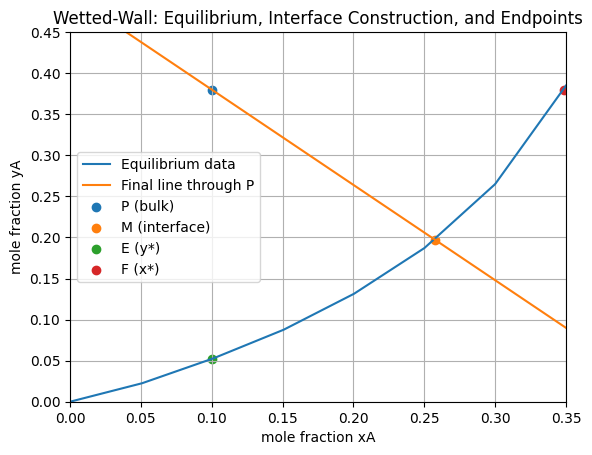

In [ ]:
# notebook cell: 22.1-7.py

import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from bank.Tower.two_film_base import (
    WettedWallTwoFilmTableSpec,
    solve_wetted_wall_two_film_from_table,
)

# Given
yAG = 0.380
xAL = 0.100

x_table = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
y_table = [0.00, 0.022, 0.052, 0.087, 0.131, 0.187, 0.265, 0.385]

ky = 1.465e-3  # k'y
kx = 1.967e-3  # k'x

spec = WettedWallTwoFilmTableSpec(
    x_table=x_table,
    y_table=y_table,
    k_y=ky,
    k_x=kx,
    y_AG=yAG,
    x_AL=xAL,
    max_iter=50,
    tol_slope=1e-10,
)

res = solve_wetted_wall_two_film_from_table(spec)

xi = res["interface"]["x_Ai"]
yi = res["interface"]["y_Ai"]

NA = res["flux"]["N_A"]
Kx_prime = res["overall"]["Kx_prime"]
Ky_prime = res["overall"]["Ky_prime"]

Kx_overall = res["overall"]["Kx_overall"]  # = K'x/(1-x)BM
Ky_overall = res["overall"]["Ky_overall"]  # = K'y/(1-y)BM

pct_gas = res["resistance"]["percent_R_gas"]

y_star = res["equilibrium_endpoints"]["y_A_star_at_xAL"]
x_star = res["equilibrium_endpoints"]["x_A_star_at_yAG"]

print("=== Interface ===")
print("x_Ai =", xi)
print("y_Ai =", yi)

print("\n=== Flux ===")
print("N_A =", NA, "kgmol/(s*m^2)")
print("N_A (overall-y) =", res["flux"]["N_A_from_overall_y"])
print("N_A (overall-x) =", res["flux"]["N_A_from_overall_x"])

print("\n=== Overall coefficients ===")
print("Kx_overall = K'x/(1-x)BM =", Kx_overall)
print("Ky_overall = K'y/(1-y)BM =", Ky_overall)
print("K'x =", Kx_prime)
print("K'y =", Ky_prime)

print("\n=== Resistance split ===")
print("% resistance in gas film =", pct_gas)

# Plot equilibrium + final PM line + points
x_grid = np.linspace(min(x_table), max(x_table), 600)
y_grid = np.interp(x_grid, x_table, y_table)

slope = res["iteration"]["slope_final"]
y_line = yAG + slope * (x_grid - xAL)

plt.figure()
plt.plot(x_grid, y_grid, label="Equilibrium data")
plt.plot(x_grid, y_line, label="Final line through P")
plt.scatter([xAL], [yAG], label="P (bulk)", marker="o")
plt.scatter([xi], [yi], label="M (interface)", marker="o")
plt.scatter([xAL], [y_star], label="E (y*)", marker="o")
plt.scatter([x_star], [yAG], label="F (x*)", marker="o")
plt.xlabel("mole fraction xA")
plt.ylabel("mole fraction yA")
plt.title("Wetted-Wall: Equilibrium, Interface Construction, and Endpoints")
plt.xlim(0.0, max(x_table))
plt.ylim(0.0, max(0.45, max(y_table)))
plt.grid(True)
plt.legend()
plt.show()